<a href="https://colab.research.google.com/github/chal0060/DeepLearning-Job_Automation/blob/main/1_DL_code_for_only_task_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Pytorch 1.0 (For Google Colab)

In [ ]:
#!pip install -q torch==1.10.0 torchvision
import torch
print(torch.__version__)

1.12.1+cu113


### 1. Data Preparation

In [ ]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision.transforms  as transforms
from torch.utils.data import dataset

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 랜덤시드 고정시키기
import torch
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(3)
torch.cuda.manual_seed(3)
torch.cuda.manual_seed_all(3)
np.random.seed(3)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(3)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/data_1118_task.csv')

In [ ]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)
df_shuffled.head(50)

,Workshop,simplepl,complexpl,teaching,advising,planning,influencing,negotiating
0,1,0.000000,0.000000,1.095890,39.452057,0.000000,0.000000,0.000000
1,1,39.452057,39.452057,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,100.000000,39.452057,100.000000,100.000000,39.452057,100.000000,100.000000
3,1,100.000000,6.575342,39.452057,39.452057,100.000000,100.000000,6.575342
4,1,100.000000,1.095890,6.575342,100.000000,0.000000,100.000000,6.575342
5,0,1.095890,0.000000,0.000000,1.095890,100.000000,0.000000,0.000000
6,1,100.000000,39.452057,39.452057,0.000000,39.452057,6.575342,0.000000
7,0,39.452057,39.452057,6.575342,39.452057,6.575342,39.452057,39.452057
8,1,1.095890,1.095890,0.000000,39.452057,100.000000,0.000000,0.000000
9,0,100.000000,39.452057,1.095890,100.000000,100.000000,39.452057,100.000000


In [ ]:
df_x = df_shuffled.iloc[:, 1:]
df_x.dropna(axis=0)

,simplepl,complexpl,teaching,advising,planning,influencing,negotiating
0,0.000000,0.000000,1.095890,39.452057,0.000000,0.00000,0.000000
1,39.452057,39.452057,0.000000,0.000000,0.000000,0.00000,0.000000
2,100.000000,39.452057,100.000000,100.000000,39.452057,100.00000,100.000000
3,100.000000,6.575342,39.452057,39.452057,100.000000,100.00000,6.575342
4,100.000000,1.095890,6.575342,100.000000,0.000000,100.00000,6.575342
...,...,...,...,...,...,...,...
9653,39.452057,100.000000,39.452057,100.000000,100.000000,100.00000,100.000000
9654,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9655,6.575342,1.095890,0.000000,6.575342,0.000000,0.00000,0.000000
9656,100.000000,100.000000,0.000000,1.095890,100.000000,100.00000,100.000000


In [ ]:
df_x.dtypes

simplepl       float64
complexpl      float64
teaching       float64
advising       float64
planning       float64
influencing    float64
negotiating    float64
dtype: object

In [ ]:
df_y = df_shuffled.iloc[:, :1]
df_y

,Workshop
0,1
1,1
2,1
3,1
4,1
...,...
9653,1
9654,1
9655,1
9656,0


In [ ]:
X=df_x.to_numpy(dtype='float', na_value=np.nan)+ 1e-6
y=df_y.to_numpy() 

In [ ]:
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:8600, :], y[8000:8600]
test_X, test_y = X[8600:, :], y[8600:]
train_X.shape
test_X.shape

(1058, 7)

### Inspecting Dataset

### 2. Model Architecture

In [ ]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=7, out_features=150)
        self.linear2 = nn.Linear(in_features=150, out_features=150)
        self.linear3 = nn.Linear(in_features=150, out_features=2)
        self.relu = nn.ReLU()
        self.dropout=nn.Dropout(0.8)
        self.use_bn = True
        self.use_xavier = True

        self.bn = nn.BatchNorm1d(150)
        
       
    
                
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x=self.bn(x)
        x=self.dropout(x)
        x = self.linear2(x)
        x = self.relu(x)
        x=self.bn(x)
        x=self.dropout(x)
        x = self.linear3(x)

        return x


### 3. Cost Function Define (Loss Function Define)  

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [ ]:
train_X= torch.FloatTensor(train_X)
train_y= torch.FloatTensor(train_y)
val_X= torch.FloatTensor(val_X)
val_y= torch.FloatTensor(val_y)
test_X= torch.FloatTensor(test_X)
test_y= torch.FloatTensor(test_y)
train_X.shape

torch.Size([8000, 7])

### 4. Train & Evaluation

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #

train_dataset = TensorDataset(train_X, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)

val_dataset = TensorDataset(val_X, val_y)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=True)
val_dataloader

test_dataset = TensorDataset(test_X, test_y)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=True)
test_dataloader

In [ ]:

torch.manual_seed(777)
torch.cuda.manual_seed(777)
torch.backends.cudnn.enabled = False 

model = MLPModel().cuda() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.


# ===== Construct Optimizer ====== #
lr = 0.001 # Learning Rate를 하나 정해줍니다. (원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.Adam(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.
## optimizer는 파라미터와, lr(학습률) 두개를 받아야 함!!


# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_train_acc = []
list_val_acc = []
list_acc_epoch = []
list_test_loss = []
list_test_acc = []

epoch =2 # 학습 횟수(epoch)을 지정해줍시다.
## 우리가 2400개 데이터가 있고 훈련set은 1600개. 1600개를 다 계산해서 업데이트 1번하면 1개의 epoch이 되는것
## iteration이라는 말과 헷갈리지 말자! iteration = 파라미터가 한번 업데이트 되는것을 iteration이라고 함. 
## 데이터가 십만개가 있더라도 한번에 다 할수없어서 100개씩 끊어서 학습을 시킴 이것을 '청킹'이라고 함. 여기서, chuck 혹은 덩어리를 batch, 혹은 minibatch라고 함.
## 이 미니배치를 넣고 cost를 구하고 gradient를 업데이트 시키는것이 1개의 iteration임!
### 총 100개의 chunk가 나옴. 100번의 iteration을 돌면, 1개의 epoch이 되는것임~!

for i in range(epoch):
    correct = 0
    total = 0
    train_loss = 0.0

    for batch_idx, samples in enumerate(train_dataloader):
        # ====== Train ====== #
        ## .train을 꼭 쓰는 습관을 들이자. 특정 layer는 traing을 할때는 활성화되는데, evalution시에는 꺼야하는 레이어가 생길 수 있음.
        
        model.train() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
        optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
        train_X, train_y = samples
        train_y = train_y.long().squeeze() 
        #print(len(train_y))
        train_X= train_X.cuda()
        train_y =train_y.cuda()
        
        outputs=model(train_X)
        #print(outputs.shape, train_y.shape)
        loss = criterion(outputs, train_y)
        loss.backward()
        optimizer.step() # step()을 통해서 그라디언틀르 바탕으로 파라미터를 업데이트 해줍니다. 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += train_y.size(0)
        correct += (predicted == train_y).sum().item()
    train_loss = train_loss / len(train_dataloader)
    train_acc = 100 * correct / total

    list_epoch.append(i)
    list_train_loss.append(train_loss)
    list_train_acc.append(train_acc)


        
        # ====== Validation ====== #
    correct = 0
    total = 0
    val_loss = 0.0   
 
    for batch_idx, samples in enumerate(val_dataloader):
        model.eval() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
        optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
        
        val_X, val_y = samples
        print(len(val_y))
        val_y = val_y.long().squeeze() 
        val_X= val_X.cuda()
        val_y =val_y.cuda()
        #print(val_X.shape)
        outputs=model(val_X)
        loss = criterion(outputs, val_y)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += val_y.size(0)
        correct += (predicted == val_y).sum().item()
        
        _, predicted = torch.max(outputs,1)
        #print(len(val_y))
        total += val_y.size(0)
        correct += (predicted == val_y).sum().item()

    val_loss = val_loss / len(val_dataloader)
    val_acc = 100 * correct / total

    
    list_val_loss.append(val_loss)    

    list_val_acc.append(val_acc)

    # ====== Evaluation ======= #
    correct = 0
    test_loss = 0.0  
    total = 0


    for batch_idx, samples in enumerate(test_dataloader):
        model.eval() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
        optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다.
        
        test_X, test_y = samples
        print(len(test_y))
        test_y = test_y.long().squeeze() 
        test_X= test_X.cuda()
        test_y =test_y.cuda()
        #print(test_X.shape)
        outputs=model(test_X)
        loss = criterion(outputs, test_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += test_y.size(0)
        correct += (predicted == test_y).sum().item()
    
    test_loss = test_loss / len(test_dataloader)
    test_acc = 100 * correct / total

    
    list_test_loss.append(test_loss)    

    list_test_acc.append(test_acc)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Train Acc : {}%, Val Acc: {}%'.format(i, train_loss, val_loss, train_acc, val_acc))

24452 parameters
256
256
88
256
256
256
256
34
Epoch: 0, Train Loss: 0.7949119918048382, Val Loss: 0.6490737597147623, Train Acc : 60.1125%, Val Acc: 66.16666666666667%
256
256
88
256
256
256
256
34
Epoch: 1, Train Loss: 0.6831666640937328, Val Loss: 0.658141036828359, Train Acc : 64.0%, Val Acc: 67.33333333333333%


In [ ]:
list_train_loss

[0.7949119918048382, 0.6831666640937328]

In [ ]:
total

1058

In [ ]:
list_test_acc

[70.79395085066163, 70.88846880907373]

In [ ]:
list_val_acc

[66.16666666666667, 67.33333333333333]

### 5. Report Experiment  
학습 과정에서 기록했던 train_loss와 val_loss를 그려봅시다.   
Loss가 꾸준히 줄어드는지 확인하고 val_loss가 증가하기 시킨다면 그 이상의 학습은 점점 모델의 성능을 망침을 뜻합니다. 
그 옆에는 Epoch에 따라서 MAE metric이 얼마나 감소하는지 확인해봅시다.

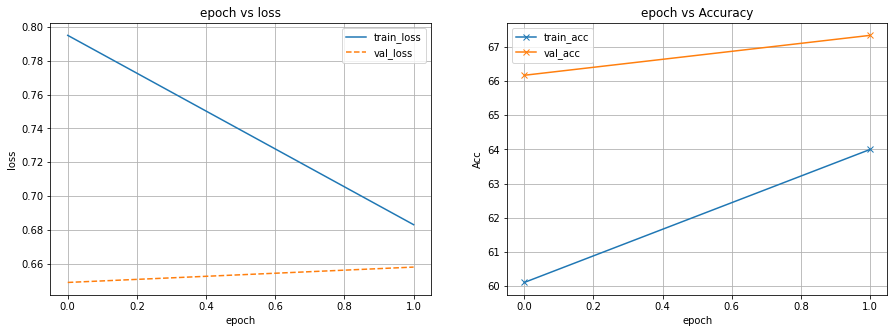

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_train_acc, marker='x', label='train_acc')
ax2.plot(list_epoch, list_val_acc, marker='x', label='val_acc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

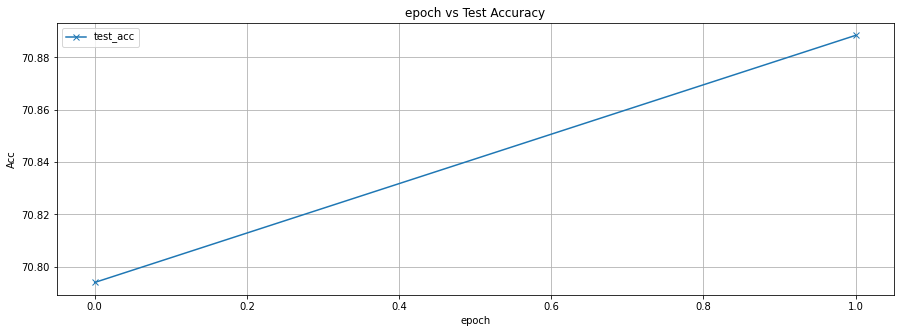

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax2 = fig.add_subplot(1, 1, 1)
ax2.plot(list_epoch, list_test_acc, marker='x', label='test_acc')

ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Test Accuracy')

plt.show()